In [24]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
dp = '/home/ebert/jupyter-notebooks/FNode-data'

name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
ivars: [u'Ix']
no loading observed
no loading observed
ivar: 0.1450	cloading: 0.021	rloading: 0.004		cretention: 0.810 +- 0.139	rretention: 1.000 +- 0.139
ivar: 0.1650	cloading: 0.026	rloading: 0.000		cretention: 0.654 +- nan	rretention: nan +- nan
ivar: 0.1850	cloading: 0.016	rloading: 0.027		cretention: 0.500 +- 0.074	rretention: 0.889 +- 0.051
ivar: 0.2050	cloading: 0.081	rloading: 0.030		cretention: 0.568 +- nan	rretention: 0.800 +- 0.061
ivar: 0.2250	cloading: 0.032	rloading: 0.102		cretention: 0.594 +- 0.032	rretention: 0.882 +- 0.027
ivar: 0.2450	cloading: 0.036	rloading: 0.128		cretention: 0.556 +- 0.027	rretention: 0.867 +- 0.025
ivar: 0.2650	cloading: 0.002	rloading: 0.086		cretention: 0.000 +- 0.007	rretention: 0.895 +- 0.028
ivar: 0.2850	cloading: 0.003	rloading: 0.026		cretention: 0.667 +- 0.044	rretention: 0.962 +- 0.032
ivar: 0.3050	cloading: 0.004	rloading: 0.020		cretention: 0.500 +- 0.056	rretention: 0

<IPython.core.display.Javascript object>


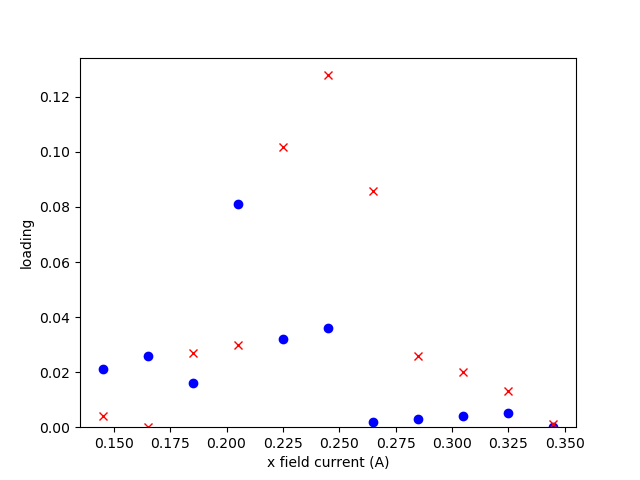

In [28]:
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])
cs_cuts = [[25],[3]]
rb_cuts = [[35],[3]]
q.set_thresholds(cs_cuts, roi=0)
q.set_thresholds(rb_cuts, roi=1)
retention = q.apply_thresholds()
cuts = q.get_thresholds()
roi_map = ['cs', 'rb']
entries = np.product(retention['retention'].shape[:-1])
tbl_str = "ivar: {0:.4f}\tcloading: {1:.3f}\trloading: {2:.3f}\t\tcretention: {3:.3f} +- {4:.3f}\trretention: {5:.3f} +- {6:.3f}"
for i in range(entries):
    print(tbl_str.format(
        retention['ivar'].reshape((entries,-1))[i][0],
        retention['loading'].reshape((entries,-1))[i][0], retention['loading'].reshape((entries,-1))[i][1],
        retention['retention'].reshape((entries,-1))[i][0], retention['error'].reshape((entries,-1))[i][0],
        retention['retention'].reshape((entries,-1))[i][1], retention['error'].reshape((entries,-1))[i][1]
    ))
q.save_experiment_data()
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.plot(retention['ivar'][e, :, 0], retention['loading'][e, :, 0], 'bo')
    ax.plot(retention['ivar'][e, :, 0], retention['loading'][e, :, 1], 'rx')
ax.set_ylim(0, 1.05*np.max(retention['loading']))
ax.set_xlabel(xlab)
ax.set_ylabel('loading')

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 'loading_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)